<h1>run BouncingBall.mo</h1>

<h1>Load modules </h1>

In [3]:
#****************************************
#    User must NOT edit code below 
#****************************************
import OMPython
from OMPython import OMCSessionZMQ

import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
print('-----')


-----


<h1>Use settings</h1>
<p>Edit the strings below </p>

In [8]:
dirWork='/home/ubuntu'

dirModelRelToInstDir='/share/doc/omc/testmodels'
nmModel='BouncingBall.mo'
stopTime=3.0
outputFormat='csv'

#****************************************
#    User must NOT edit code below 
#****************************************
print("########## check user settings ##########")
print("Temporary Working directory is: "+str(dirWork))
fullpathModel= dirModelRelToInstDir + '/' + nmModel
print("Model to be ran is: " + fullpathModel)

########## check user settings ##########
Temporary Working directory is: /home/ubuntu
Model to be ran is: /share/doc/omc/testmodels/BouncingBall.mo


<h1>Setup </h1>

In [9]:
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

# load Modelica Standard Library
omc.sendExpression("loadModel(Modelica)")

# move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
omc.sendExpression(strcmd)

# load model
strcmd= 'loadFile(getInstallationDirectoryPath()+ ' + '"'+ fullpathModel + '")'
omc.sendExpression(strcmd)


True

<h1>Run simulation</h1>

In [10]:
#****************************************
#    User must NOT edit code below 
#****************************************
print("...running simulation, wait...")
omc.sendExpression("simulate(BouncingBall, stopTime=3.0, outputFormat=\"csv\")")

...running simulation, wait...


{'resultFile': '/home/ubuntu/BouncingBall_res.csv',
 'simulationOptions': "startTime = 0.0, stopTime = 3.0, numberOfIntervals = 500, tolerance = 1e-06, method = 'dassl', fileNamePrefix = 'BouncingBall', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = ''",
 'messages': 'LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.\nLOG_SUCCESS       | info    | The simulation finished successfully.\n',
 'timeFrontend': 0.236825865,
 'timeBackend': 0.003866024,
 'timeSimCode': 0.001215413,
 'timeTemplates': 0.006276685000000001,
 'timeCompile': 0.835762114,
 'timeSimulation': 0.019590159,
 'timeTotal': 1.103680904}

<h1>Post Process</h1>

In [11]:
os.chdir(dirWork)
os.getcwd()

'/home/ubuntu'

In [12]:
df= pd.read_csv('BouncingBall_res.csv')
df

time             h        v   der(h)  der(v)  v_new  foo  flying  impact
0    0.000  1.000000e+00  0.00000  0.00000   -9.81    0.0    2       1       0
1    0.006  9.998234e-01 -0.05886 -0.05886   -9.81    0.0    2       1       0
2    0.012  9.992937e-01 -0.11772 -0.11772   -9.81    0.0    2       1       0
3    0.018  9.984108e-01 -0.17658 -0.17658   -9.81    0.0    2       1       0
4    0.024  9.971747e-01 -0.23544 -0.23544   -9.81    0.0    2       1       0
..     ...           ...      ...      ...     ...    ...  ...     ...     ...
687  2.982  2.101988e-11  0.00000  0.00000    0.00    0.0    1       0       1
688  2.988  2.101988e-11  0.00000  0.00000    0.00    0.0    1       0       1
689  2.994  2.101988e-11  0.00000  0.00000    0.00    0.0    1       0       1
690  3.000  2.101988e-11  0.00000  0.00000    0.00    0.0    1       0       1
691  3.000  2.101988e-11  0.00000  0.00000    0.00    0.0    1       0       1

[692 rows x 9 columns]

<AxesSubplot:xlabel='time'>

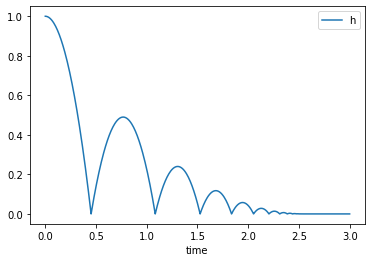

In [13]:
df.plot(x="time", y="h")
